In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import denn.utils as utils
import numpy as np

In [2]:
fnames = ['../../results/csvs/nlo_GAN_niters.csv', '../../results/csvs/nlo_L2_niters.csv',
          '../../results/csvs/sho_GAN_hypertune_niters.csv', 
          '../../results/csvs/sho_L2_hypertune_niters.csv']

In [3]:
dfs = []
for f in fnames:
    dfs.append(
        pd.read_csv(f, index_col=0)
    )

In [15]:
from IPython.display import display
mses = []
niters = [1000, 5000, 10000, 20000, 50000, 100000]
for d in dfs:
    display(d.head())
    mses.append(
        d.mse
    )

,mse,hypers
0,0.230614,"{'gan_niters': 1000, 'disc_n_hidden_units': 64..."
1,0.812740,"{'gan_niters': 5000, 'disc_n_hidden_units': 64..."
2,0.000006,"{'gan_niters': 10000, 'disc_n_hidden_units': 6..."
3,0.812760,"{'gan_niters': 20000, 'disc_n_hidden_units': 6..."
4,0.000047,"{'gan_niters': 50000, 'disc_n_hidden_units': 6..."


,mse,hypers
0,0.112918,"{'model_n_hidden_units': 64, 'model_n_hidden_l..."
1,0.812749,"{'model_n_hidden_units': 64, 'model_n_hidden_l..."
2,0.074428,"{'model_n_hidden_units': 64, 'model_n_hidden_l..."
3,0.028807,"{'model_n_hidden_units': 64, 'model_n_hidden_l..."
4,0.002985,"{'model_n_hidden_units': 64, 'model_n_hidden_l..."


,mse,hypers
0,1.891838e-01,"{'gan_niters': 1000, 'disc_n_hidden_units': 64..."
1,3.096387e-08,"{'gan_niters': 5000, 'disc_n_hidden_units': 64..."
2,6.090726e-09,"{'gan_niters': 10000, 'disc_n_hidden_units': 6..."
3,3.267294e-09,"{'gan_niters': 20000, 'disc_n_hidden_units': 6..."
4,9.881341e-10,"{'gan_niters': 50000, 'disc_n_hidden_units': 6..."


,mse,hypers
0,1.458767e-01,"{'model_n_hidden_units': 64, 'model_n_hidden_l..."
1,3.690528e-07,"{'model_n_hidden_units': 64, 'model_n_hidden_l..."
2,2.770371e-08,"{'model_n_hidden_units': 64, 'model_n_hidden_l..."
3,9.999210e-10,"{'model_n_hidden_units': 64, 'model_n_hidden_l..."
4,3.785751e-10,"{'model_n_hidden_units': 64, 'model_n_hidden_l..."


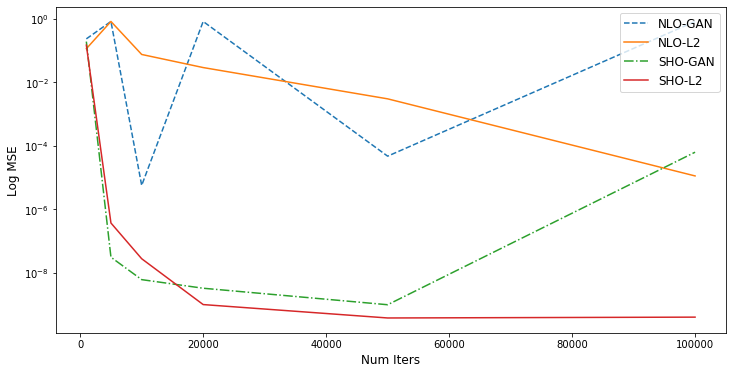

In [28]:
plt.figure(figsize=(12,6))
plt.plot(niters, mses[0], '--', label='NLO-GAN')
plt.plot(niters, mses[1], label='NLO-L2')
plt.plot(niters, mses[2], '-.', label='SHO-GAN')
plt.plot(niters, mses[3], label='SHO-L2')
plt.ylabel('Log MSE')
plt.xlabel('Num Iters')
plt.legend(loc='upper right')
plt.yscale('log')

In [29]:
newfs = ['../../results/csvs/sho_GAN_niters.csv', 
         '../../results/csvs/sho_L2_niters.csv']

In [30]:
newdfs = []
for f in newfs:
    newdfs.append(
        pd.read_csv(f, index_col=0)
    )

In [31]:
newdfs[0].head()

,mse,hypers
0,"[0.1891838014125824, 0.20131973922252655, 0.18...","{'gan_niters': 1000, 'disc_n_hidden_units': 64..."
1,"[3.096386791412442e-08, 2.6667001051805528e-08...","{'gan_niters': 5000, 'disc_n_hidden_units': 64..."
2,"[6.0907257015685445e-09, 2.0279339096873628e-0...","{'gan_niters': 10000, 'disc_n_hidden_units': 6..."
3,"[3.267293768871582e-09, 2.8852687350422457e-08...","{'gan_niters': 20000, 'disc_n_hidden_units': 6..."
4,"[9.881341300754798e-10, 2.614183092219946e-09,...","{'gan_niters': 50000, 'disc_n_hidden_units': 6..."


In [58]:
best_run_from_list_string = lambda x: np.min(np.array(x.strip('][').split(', '), dtype=np.float))

In [60]:
min_mses = []
for df in newdfs:
    min_mses.append(
        df.mse.apply(best_run_from_list_string).tolist()
    )
    

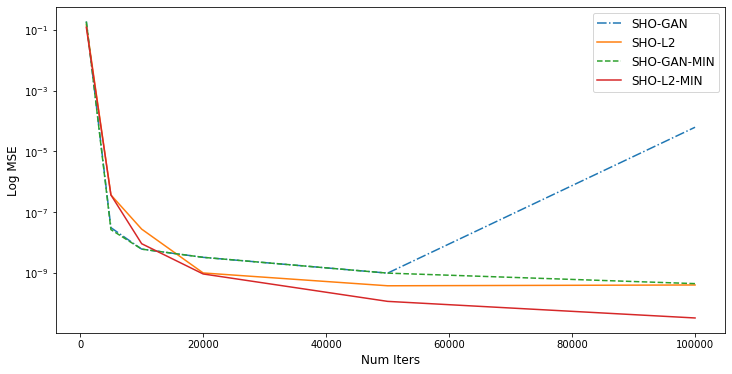

In [63]:
plt.figure(figsize=(12,6))
# plt.plot(niters, mses[0], '--', label='NLO-GAN')
# plt.plot(niters, mses[1], label='NLO-L2')
plt.plot(niters, mses[2], '-.', label='SHO-GAN')
plt.plot(niters, mses[3], label='SHO-L2')
plt.plot(niters, min_mses[0], '--', label='SHO-GAN-MIN')
plt.plot(niters, min_mses[1], label='SHO-L2-MIN')
plt.ylabel('Log MSE')
plt.xlabel('Num Iters')
plt.legend(loc='upper right')
plt.yscale('log')